Import Dependencies

In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [128]:
from warnings import filterwarnings
filterwarnings('ignore')

Loading Data

In [129]:
file_2015='Datasets/Happiness_dataset/2015.csv'
file_2016='Datasets/Happiness_dataset/2016.csv'
file_2017='Datasets/Happiness_dataset/2017.csv'
file_2018='Datasets/Happiness_dataset/2018.csv'
file_2019='Datasets/Happiness_dataset/2019.csv'

In [130]:
df_2015=pd.read_csv(file_2015)
df_2016=pd.read_csv(file_2016)
df_2017=pd.read_csv(file_2017)
df_2018=pd.read_csv(file_2018)
df_2019=pd.read_csv(file_2019)

Viewing Data

In [131]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [132]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [133]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [134]:
df_2015.value_counts()

Country                  Region                           Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  Family   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
Afghanistan              Southern Asia                    153             3.575            0.03084         0.31982                   0.30285  0.30335                   0.23414  0.09719                        0.36510     1.95210              1
Palestinian Territories  Middle East and Northern Africa  108             4.715            0.04394         0.59867                   0.92558  0.66015                   0.24499  0.12905                        0.11251     2.04384              1
Nicaragua                Latin America and Caribbean      57              5.828            0.05371         0.59325                   1.14184  0.74314                   0.55475  0.19317                        0.27815     2.32407              1
Niger                    Sub-Saha

Data Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

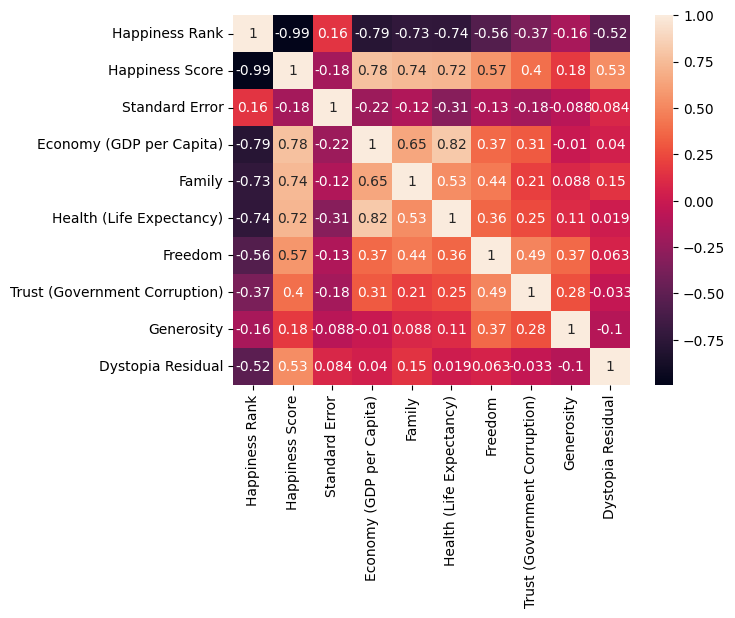

In [135]:
sns.heatmap(df_2015.corr(numeric_only=True), annot=True)
plt.show

In [136]:
df_2015=df_2015.drop(columns=['Country','Region','Standard Error','Dystopia Residual','Happiness Rank'])

In [137]:
df_2015.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [138]:
x=df_2015.drop(columns=['Happiness Score'])
y=df_2015['Happiness Score']

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Loading a Random Forest Regression Model

In [140]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)

In [141]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [142]:
y_pred=rf.predict(x_test)

In [143]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [144]:
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R2 Score: 0.8096154236105478
Mean Squared Error: 0.27010824548125006


Using the model to predict the happiness score

In [145]:
#Happiness is based on GDP,family ,health ,freedom ,trust and generosity
gdp=1.39651 #income
family=1.34951 #social support
health=0.833 #based on life expectancy
freedom=0.62
trust=0.33 #based on corruption perception of govenment
generosity=0.40

In [146]:
x_input=[gdp,family,health,freedom,trust,generosity]

In [167]:
y_result=rf.predict([x_input])
print(f'Predicted Happiness Score: {y_result[0]}') 

if y_result[0]<=5:
    print('The country is Unhappy.')
else:
    print('The country is Happy.')

Predicted Happiness Score: 7.186750000000006
The country is Happy.
